## Data cleaning (Missing data)
This notebook is going to talk about how to handle missing data. Before we get into it, we should first understand that usually when we look at feature data, we are looking at 2 types of data.

1. Numerical variable, could be integer or float type. For instance, what is the price? $100? $200?
2. Categorical variable, usually string. For instance, what's the colour type? Red? Yellow?
    * For categorical variable, we have to differentiate between ordinal vs nominal data. Ordinal means there is some importance in the order of the data, for instance, education level: middle school, high school, university, graduate school. Nominal variables are those who does not have any importance in the order.
    * There is also binary-outcome categorical variable, basically it only has 2 possible outcomes (for example, yes or no)
    
Depending on the type of the variable, a suitable method should be used to pre-process the data. And the data used in this notebook is a house pricing data from Kaggle which can be downloaded through [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

This notebook will break into the following parts:
1. Importing Data and Python Packages
2. Detecting and Visualizing Missing Values
3. Data cleaning with numerical variable
4. Data cleaning with categorical variable

### 1. Importing Data and Python Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import missingno as msno

C:\Users\User\miniconda3\envs\PythonCPU\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("./house_prices/train.csv")

In [3]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Seems like we have some features with missing data. Let's dive deeper into it

### 2. Detecting Missing Values

In [5]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
df_missing= missing_values_table(df)
df_missing

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


In [7]:
# These are the columns which has at least one null values
missing_data_col = df.columns[df.isna().any()].tolist()
missing_data_col

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

To visualize how many values are missing in the columns, we can use `missingno` package. Since the original dataset has 81 columns, I am only going to plot the 17 columns that has missing values, else it would've been hard to visualize them.

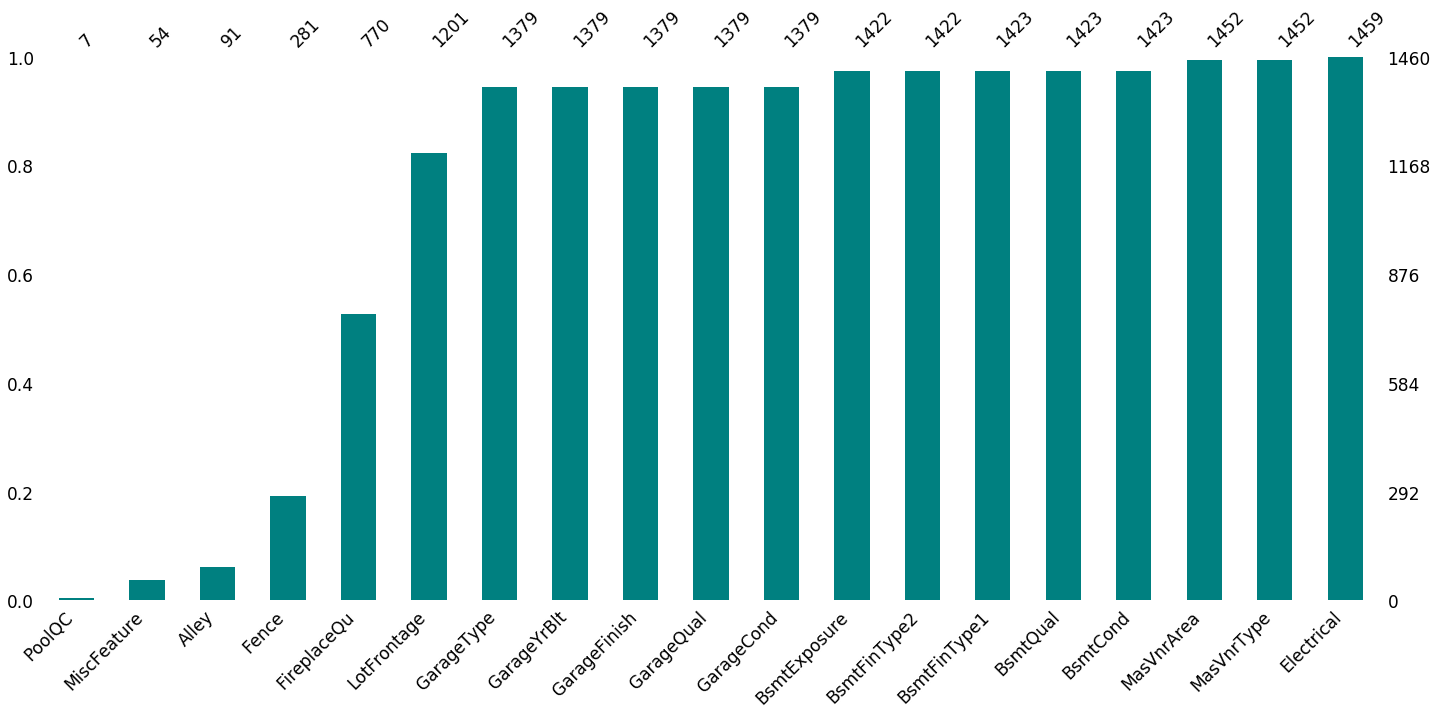

In [8]:
msno.bar(df[missing_data_col], color="teal", sort="ascending", fontsize=17)

From here, we can see that 'Alley', 'PoolQC', 'Fence' and 'MiscFeature' has a substantial percentage of missing data values.

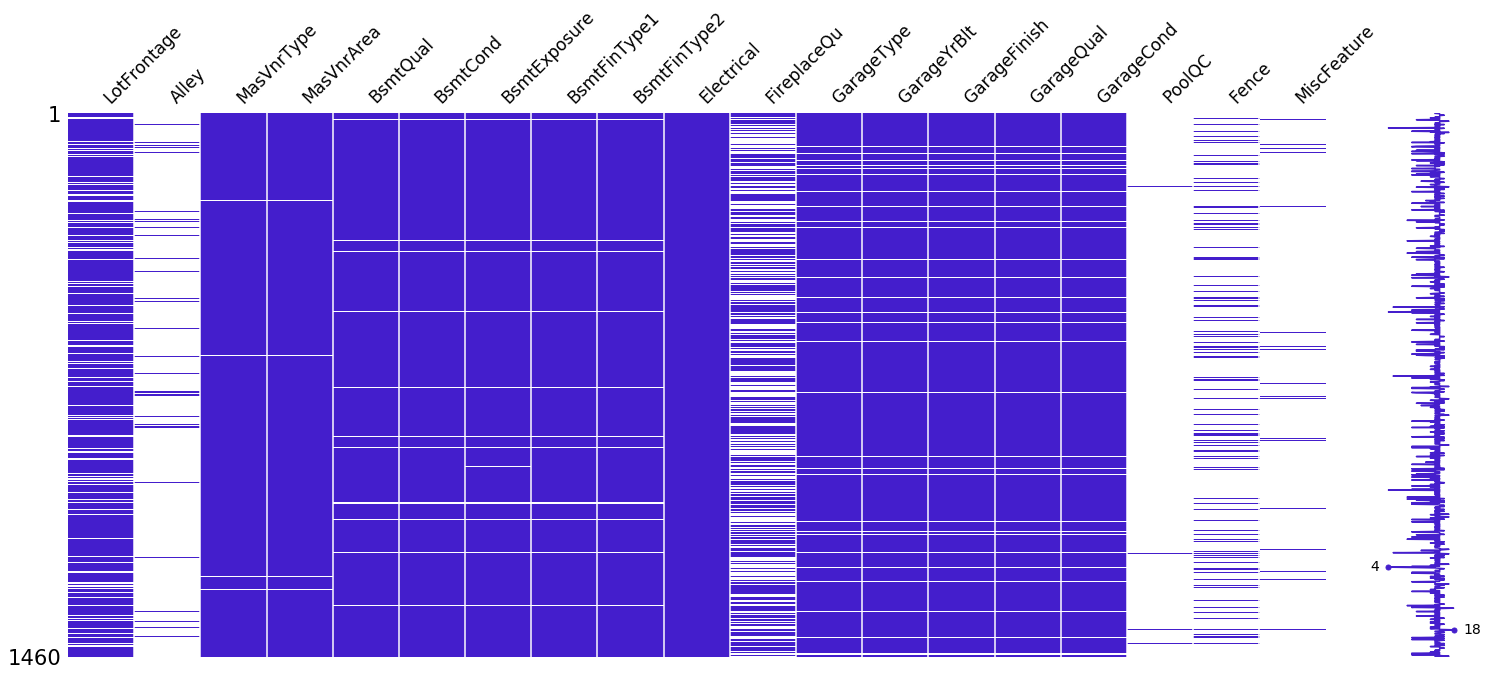

In [9]:
msno.matrix(df[missing_data_col], fontsize=17, color=(0.27, 0.12, 0.8))

The plot appears blank(white) wherever there are missing values. For instance, in MasVnrType column there are only 4 instances of missing data, hence the 4 white lines.

The sparkline on the right gives an idea of the general shape of the completeness of the data and points out the row with the minimum nullities and the total number of columns in a given dataset, at the bottom.

We can also use a heatmap to pick up interesting correlations between different exchanges:

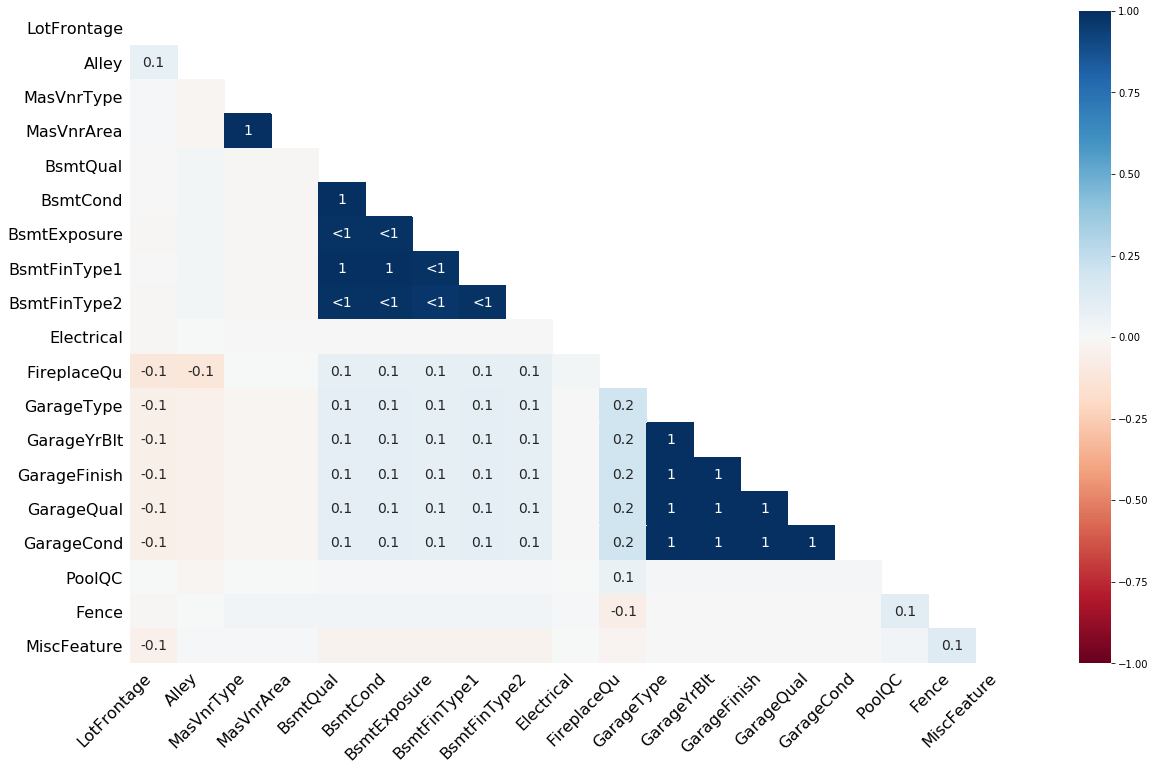

In [10]:
msno.heatmap(df)  # , cmap="RdYlGn"

From here, we can see that there is a postive correlation between 'BsmtCond' and 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure'. Same goes with 'GarageYrBlt', 'GarageFinish', 'GarageQual', and 'GarageCond'. Which means it's likely that missing values tend to appear in the same rows.

High correlations further indicate that the data missing are Missing Not at Random (MNAR), meaning that missingness depends on unobserved data or the value of the missing data itself.

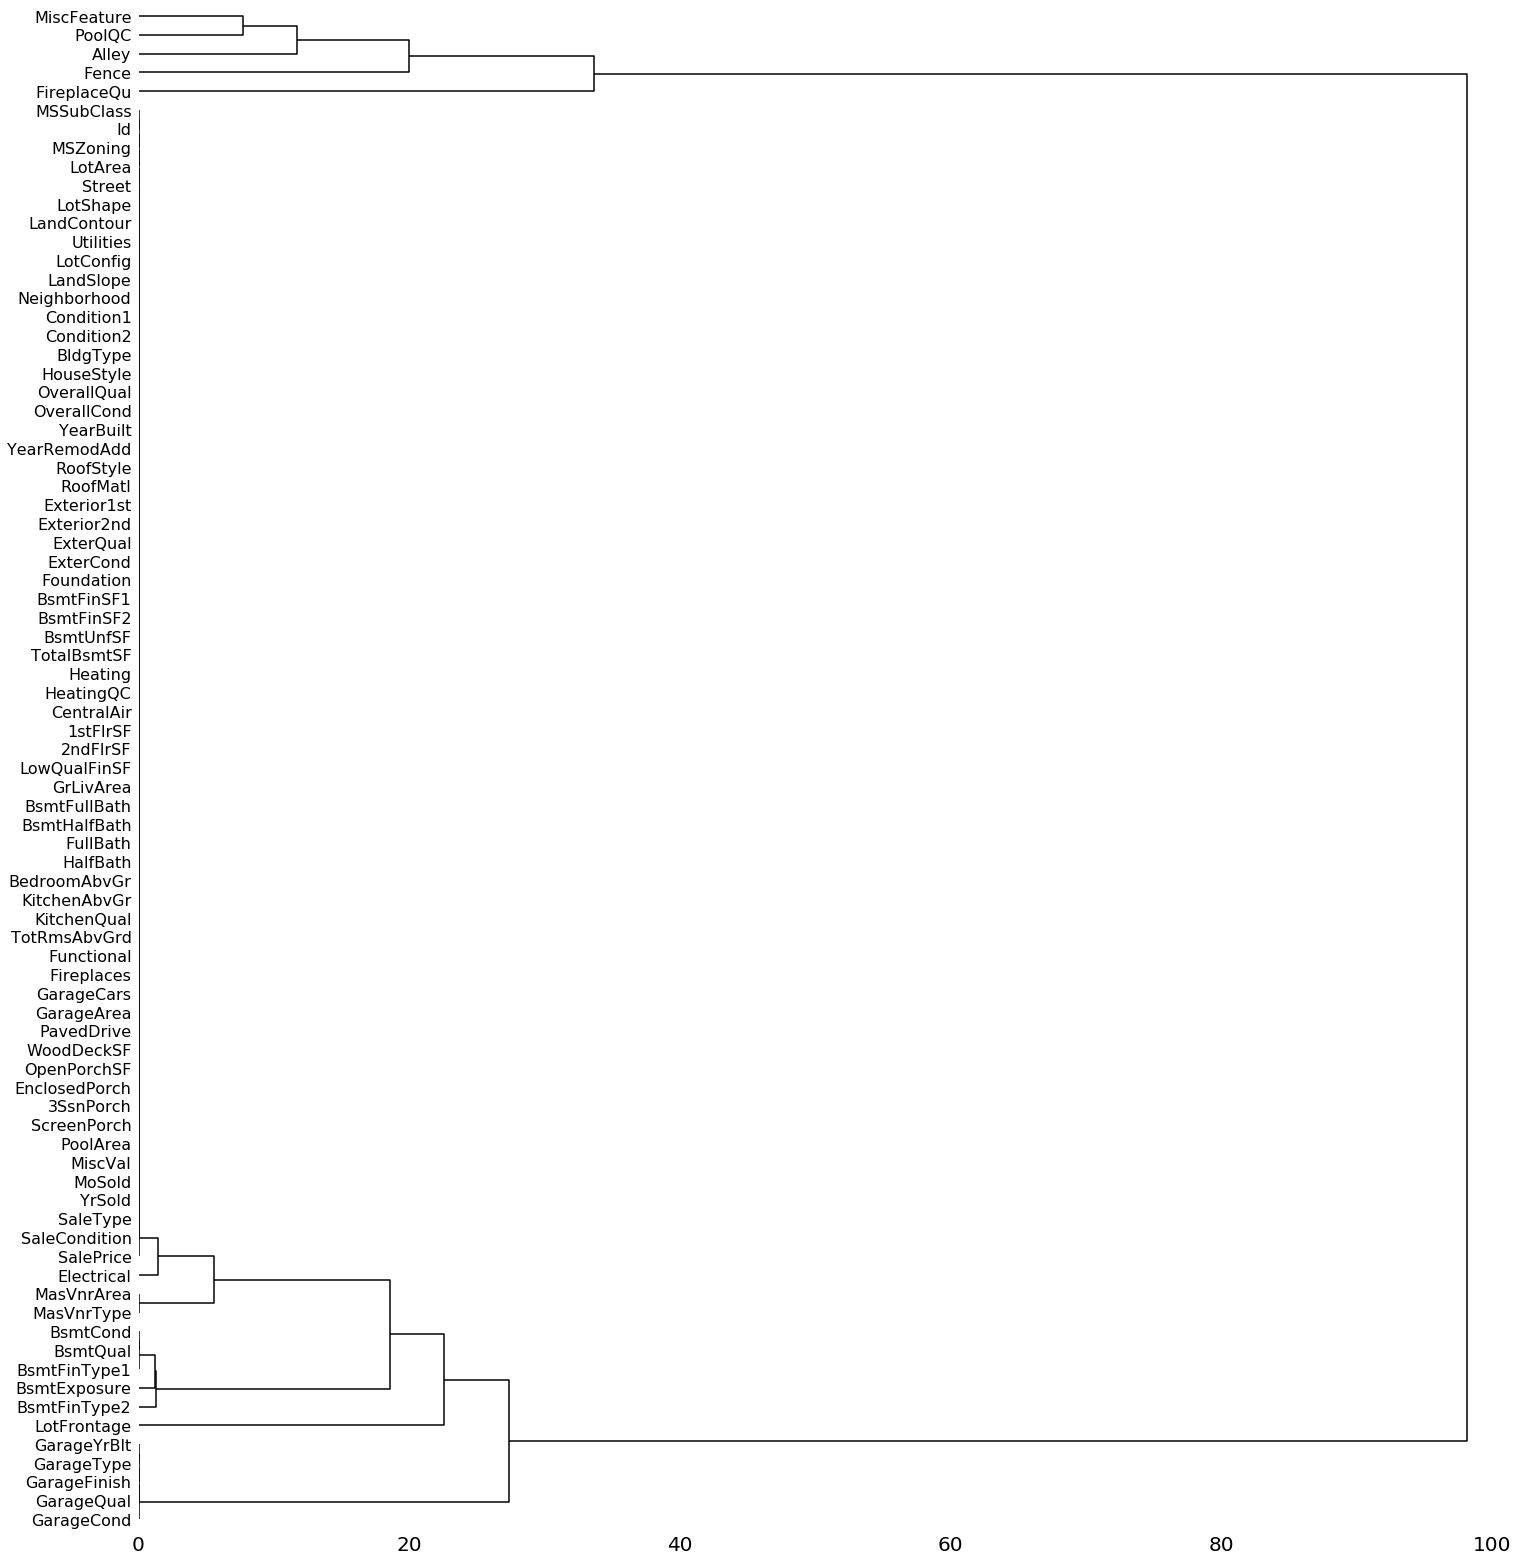

In [11]:
msno.dendrogram(df, orientation="right", method="ward")

We can see that 'BsmtCond' and 'BsmtQual' cluster together to form nullity before merging with 'BsmtFinType1', 'BsmtFinType2' and 'BsmtExposure'. Same thing goes for Garage features. This shows that they are correlated to one another.

### 3. Data cleaning with numerical variable

In [12]:
# Numerical variables:
numerical = df.select_dtypes(include = ["int64","float64"]).keys()
print(numerical)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [13]:
df[numerical].head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [14]:
df[numerical].isnull().sum().sum()

348

We have 348 nan values across all numerical columns. Let's check rows with one or more NaN values in dataframe

In [15]:
df[df.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
# These are the columns which has at least one null values
missing_data_col = df[numerical].columns[df[numerical].isna().any()].tolist()
missing_data_col

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [18]:
# Check percentage of missing values in each column
(df[missing_data_col].isna().mean().round(4) * 100).sort_values()

MasVnrArea      0.55
GarageYrBlt     5.55
LotFrontage    17.74
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026735A0FCC0>,
      dtype=object)

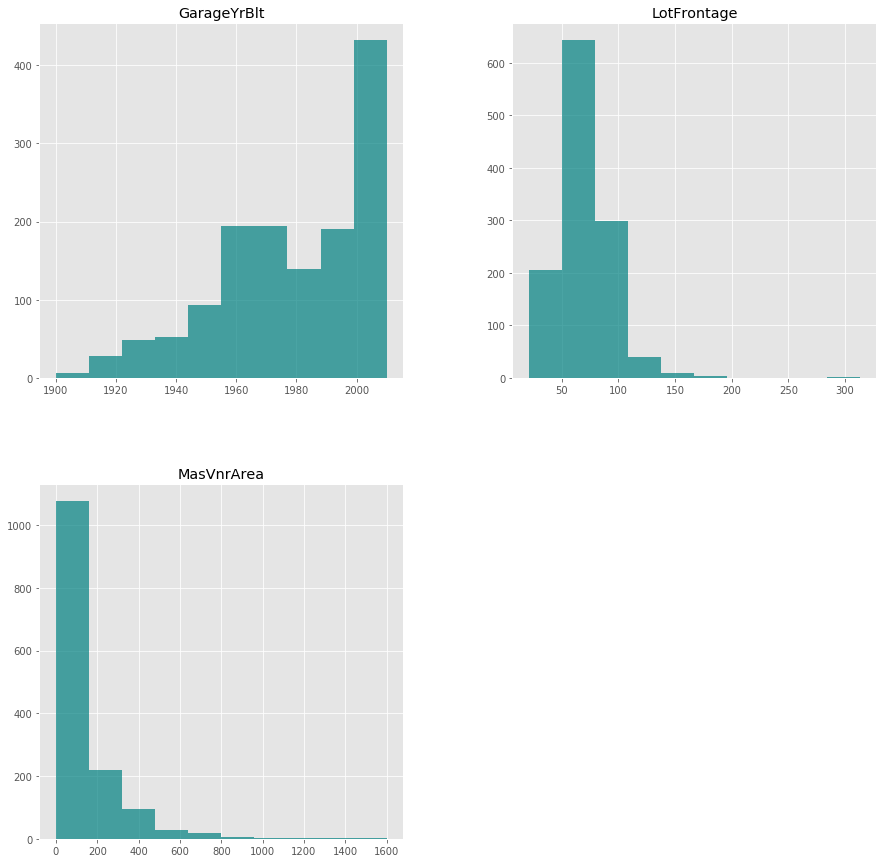

In [19]:
# Quick visualization
plt.style.use('ggplot')
rcParams['figure.figsize'] = 15, 15

df[missing_data_col].hist(stacked=True, color='teal', alpha=0.7)

It seems that "GarageYrBuilt" is left skewed while the other 2 columns are right-skewed. This can be transformed using log transformation but that's another story. 

### 2.1  Data Imputation
Replacing the missing values with mean. It sounds simple, but it generally works well depending on the dataset. But some might ask, why mean instead of median? It depends on your data. If there is a lot of outliers in the dataset, median may work better. Otherwise, I'd go with mean. 

It is also important to know how is your data missing. For instance, in this case, I wouldn't use data imputation for the "GarageYrBlt" because the null values could simply mean that these houses do not have a garage, so it wouldn't make sense to impute values for the missing data

In [20]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

Another more 'adavanced' imputation technique is to use kNN based method instead of using mean/ medians.

In [21]:
from sklearn.impute import KNNImputer

# df_knn = df.copy(deep=True)
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df['LotFrontage'] = knn_imputer.fit_transform(df[['LotFrontage']])

In [22]:
# Check percentage of missing values in each column
(df[missing_data_col].isna().mean().round(4) * 100).sort_values()

LotFrontage    0.00
MasVnrArea     0.00
GarageYrBlt    5.55
dtype: float64

And now, we are left with 'GarageYrBlt' column that has 5% missing data.

## 2.2 Different approach to data imputation
Instead of simply imputing the missing values with mean/ median. Another approach is to use that column and create another column based on it, specifically a categorical variable to indicate which rows of that column had missing data. As you can imagine, the new column would have `True` or `False` value or `(0, 1)`

In [23]:
# Make copy to avoid changing original data (when imputing)
df_plus = df.copy(deep=True)

In [24]:
garage_column = ['GarageType', 'GarageYrBlt','GarageFinish', 'GarageQual', 'GarageCond']
df_plus[garage_column].isna().sum()

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

We can see that all the null values are aligned with one another for garage values, which means null values most likely mean that there is no garage.

In [25]:
df_plus['GarageYrBlt'] =  df_plus['GarageYrBlt'].fillna(0)

def label_garage(row):
    if row['GarageYrBlt'] == 0:
        return 0
    return 1

In [26]:
df_plus['has_garage'] = df_plus.apply(lambda row: label_garage(row), axis=1)
df_plus['has_garage'].value_counts()

1    1379
0      81
Name: has_garage, dtype: int64

There are 81 properties that does not have a garage.

## 3. Data cleaning with categorical variable

In [27]:
# Categorical variables:
categorical = df.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [28]:
# These are the columns which has at least one null values
missing_data_col = df[categorical].columns[df[categorical].isna().any()].tolist()
missing_data_col

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [29]:
# Check percentage of missing values in each column
(df[missing_data_col].isna().mean().round(4) * 100).sort_values()

Electrical       0.07
MasVnrType       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
BsmtExposure     2.60
BsmtFinType2     2.60
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
FireplaceQu     47.26
Fence           80.75
Alley           93.77
MiscFeature     96.30
PoolQC          99.52
dtype: float64

## 3.1 Dropping columns
Sometimes there is so much data missing that you can't really do anything about it. You can't impute using mean or median as it may not represent the data. So, the best option is to just discard them. However, it is wise to have a quick analysis of the data to see if maybe you could create a feature from it. You can set a threshold where if the percentage exceeds the threshold, the column will be discarded

In [30]:
# Setting the threshold
threshold = 0.8 

# Dropping columns with missing value rate higher than threshold
for i, col in enumerate (missing_data_col):
    if (df[col].isna().mean().round(4) > threshold):
        print(col)

Alley
PoolQC
Fence
MiscFeature


These are the columns that has nan values higher than 80% of the total length of the dataset.

In [31]:
df = df.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature'])

## 3.2 Replacing missing values with custom values
Now. let's look at the next column, FireplaceQu

In [64]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

Don't quite understand what does Fa, Ex or Po mean but I am assuming it's a measure of quality of the Fireplace, and if we inspect the "Fireplaces" column, maybe we can't derive some information

In [33]:
df['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [34]:
df['FireplaceQu'].isnull().sum()

690

Coincidence? I think not. This just means that the reason there are missing values in the column is because there is no fireplace in the 1st place. In this case, what we can do, is replace the missing values with something to indicate that there is no fireplace

In [35]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('NoFireplace')

In [38]:
df['FireplaceQu'].value_counts()

NoFireplace    690
Gd             380
TA             313
Fa              33
Ex              24
Po              20
Name: FireplaceQu, dtype: int64

As for the rest of the categorical column, a similar method can be used as well. Notice that the garage features all have the same number of missing values so it's likely that these missing rows don't have values because there is no garage, which is similar to the situation with the Fireplace.